<h1 style='text-align:center;border:10px double;border-color:gray;'>
    <br/>
     PROJET 3<br/>
    <br/>
    <font color = 'Navy'>"Concevez une application au service de la santé publique"</font>
    <br/>
    <br/>
    
</h1>
<h4 style='text-align:left;border-color:gray;'>
    <br/>
    <font color = 'Navy'>* notebook d’évaluation</font>
    <br/>
</h4>

 Dirigé par :   [Pouria Forouzesh](https://www.linkedin.com/in/pouria-forouzesh/)

Le Nutri-Score est un logo qui indique la qualité nutritionnelle des aliments avec des notes allant de A à E. Avec le NutriScore, les produits peuvent être facilement et rapidement comparés.

Open Food Facts a commencé à calculer le Nutri-Score en 2014 sur son application mobile et son site Web pionniers, alors qu'il ne s'agissait que d'un document de recherche, et a accompagné son évolution, du "score 5 couleurs" au "Nutri-Score" que vous voyez dans les supermarchés aujourd'hui. Cet impact systémique a été remarqué par Santé publique France qui soutient désormais Open Food Facts dans sa mission d'aider chacun à faire des choix alimentaires plus éclairés. Pour en savoir plus sur l'histoire d'Open Food Facts et de l'Eco-Score, vous pouvez consulter notre page dédiée.
Les données sont disponibles à l'adresse suivante : https://fr.openfoodfacts.org/

Comment le Nutri-Score est-il calculé?

- La note Nutri-Score est déterminée par la quantité de nutriments bons et mauvais pour la santé :

Points négatifs : l'énergie, les graisses saturées, les sucres, et le sodium (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).
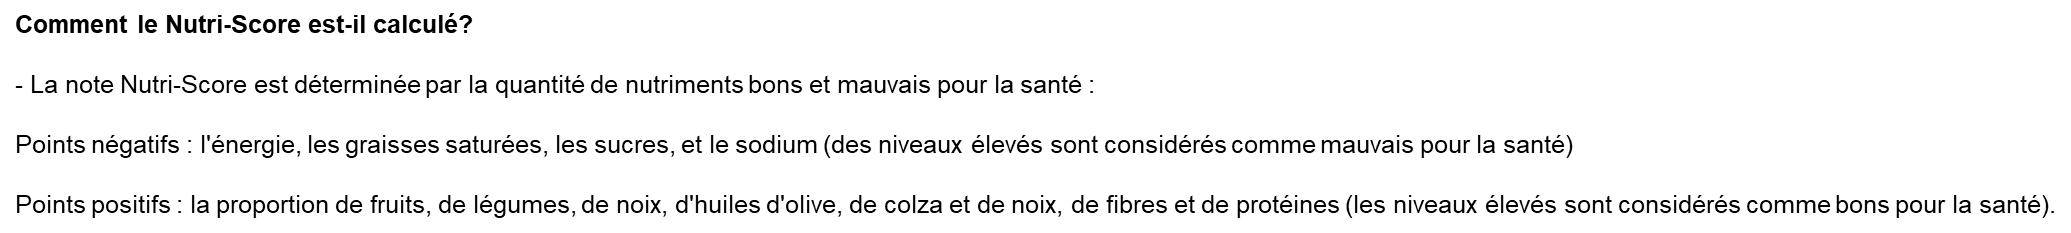

#### Idée : Scanner n'importe quel produit et obtenir un indicateur sur la qualiténutritionnelle du produit, note basé sur le Nutri-Score

#### Informations sur le Nutri-Score :

Le Nutri-Score, aussi appelé système 5 couleurs, est un système d'étiquetage nutritionnel basé sur un logo avec cinq valeurs allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il est mis en place par le gouvernement Français en 2016 dans le cadre de la loi de modernisation du système de santé.

Le score est calculé par un système de points, le score le plus faible étant le meilleur :

Eléments défavorables au score :
- apport calorique
- teneur en sucre
- teneur en graisses saturés
- teneur en sel

Eléments favorables au score :
- teneur en fruits, légumes, légumineuses et oléagineux
- teneur en fibres
- teneur en protéines

Des points sont attribués en fonction des éléments favorables et défavorables et un grade est attribué à chaque produit en fonction de son score :

Pour les aliments :

A :-15 à 0

B : 0 à 2

C : 2 à 9

D : 10 à 17

E : 18 à 32

Pour plus d'informations : https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/

Idée : Scanner n'importe quel produit et obtenir un indicateur sur la qualité nutritionnelle du produit, note basé sur le Nutri-Score


In [40]:
from joblib import load

# charger le modèle à partir du fichier
rfr = load('model.pkl')
rfr2 = load('model2.pkl')

In [2]:
df= pd.read_csv('data_clean_principal.csv')
dfbig = df.copy()
df.dropna()
df.shape

<IPython.core.display.Javascript object>

(52257, 33)

In [3]:
df = df[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr']]
df.shape

(52257, 17)

In [4]:
df2 = df[['saturated-fat_100g', 'calcium_100g', 'energy_100g', 'sugars_100g',
          'salt_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr']]
df2.shape

(52257, 7)

In [46]:
# Prendre 5 échantillons aléatoires
samples = df.sample(n=5)
samples

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition_grade_fr
36013,1205.0,19.9,9.3,0.124499,0.001439,18.0,1.3,2.000000,8.7,1.524,0.600000,0.000386,0.008183,0.568122,0.013304,16.0,d
31519,977.0,25.2,1.7,0.042853,0.000000,1.2,0.0,5.133333,0.6,2.100,0.826772,0.000302,0.093773,0.630296,0.005947,12.0,d
37108,1254.0,3.2,1.2,0.436681,0.012594,61.0,42.0,0.650000,4.9,0.100,0.039370,0.000257,0.000033,0.281907,0.006382,13.0,d
3809,360.0,0.4,0.1,0.016771,0.000000,12.0,0.4,4.200000,6.1,0.970,0.381890,0.000375,0.019327,0.185040,0.007258,-3.0,a
22171,491.0,4.3,0.4,1.000000,0.000599,12.1,3.4,0.000000,7.4,1.778,0.700000,0.000224,0.013205,0.920095,0.007000,4.0,c


In [47]:
X = samples.drop(columns=['nutrition-score-fr_100g', 'nutrition_grade_fr' ], axis=1)
y = samples['nutrition-score-fr_100g']
print(X.shape, y.shape)
scaler = StandardScaler()
X = scaler.fit_transform(X)


(5, 15) (5,)


<IPython.core.display.Javascript object>

In [48]:
y_pred = rfr.predict(X);
y_pred = list(y_pred)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[17.84, 12.485, 17.53, -6.055, 9.59]

In [49]:
samples.iloc[:,-1]

36013    d
31519    d
37108    d
3809     a
22171    c
Name: nutrition_grade_fr, dtype: object

In [50]:
num_etiquet_group = []
for num in y_pred:
    
        if -15 <= num < 0:
            num_etiquet = 'a'
        elif 0 <= num < 2:
            num_etiquet = 'b'
        elif 2 <= num < 10:    
            num_etiquet = 'c'
        elif 10 <= num < 18:    
            num_etiquet = 'd'
        elif 18 <= num <= 32:    
            num_etiquet = 'e'
        else:
            num_etiquet = 'Out of range'
        num_etiquet_group.append(num_etiquet)
        

In [51]:
num_etiquet_group

['d', 'd', 'd', 'a', 'c']

In [52]:
resultat = pd.DataFrame({'nutriscore_reel' : samples.iloc[:,-1], 'prediction' : num_etiquet_group})
resultat

<IPython.core.display.Javascript object>

,nutriscore_reel,prediction
36013,d,d
31519,d,d
37108,d,d
3809,a,a
22171,c,c


**un exemple de code pour scanner un code-barres à l'aide de la bibliothèque "python-barcode" et stocker les informations dans un dataframe pandas :**

Ce code est un programme de scanner de code-barres. Il utilise la bibliothèque OpenCV pour détecter les codes-barres dans l'image capturée par la caméra de l'ordinateur et l'API Open Food Facts pour récupérer les informations nutritionnelles associées au produit.

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import json
from typing import Dict

def get_nutritional_info(gtin: str) -> Dict[str, float]:
    # API endpoint pour récupérer les informations nutritionnelles du produit
    url = f"https://world.openfoodfacts.org/api/v0/product/{gtin}.json"

    # Envoyer une requête à l'API et récupérer la réponse
    response = requests.get(url)
    data = json.loads(response.text)

    # Extraire les données nutritionnelles
    nutritional_info: Dict[str, float] = {}
    if "product" in data and "nutriments" in data["product"]:
        nutriments = data["product"]["nutriments"]
        nutritional_info = {
            'energy_100g': float(nutriments.get('energy_100g', 0)),
            'saturated-fat_100g': float(nutriments.get('saturated-fat_100g', 0)),
            'sugars_100g': float(nutriments.get('sugars_100g', 0)),
            'proteins_100g': float(nutriments.get('proteins_100g', 0)),
            'salt_100g': float(nutriments.get('salt_100g', 0)),
            
        }
    return nutritional_info


# Activer la caméra
cap = cv2.VideoCapture(0)

# Lire l'image depuis la caméra et la décoder
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Détecter les codes-barres avec OpenCV
    detector = cv2.QRCodeDetector()
    data, bbox, _ = detector.detectAndDecode(gray)
    if bbox is not None and data:
        # Extraire le code-barres
        barcode = data.strip()
        if barcode:
            # Récupérer les informations nutritionnelles
                       
            nutritional_info = get_nutritional_info(barcode)
            if nutritional_info:
                # Créer un DataFrame avec les informations nutritionnelles
                columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'calcium_100g' ]
                df = pd.DataFrame(nutritional_info, columns=columns, index=[0])
                print(df)
            else:
                print("Impossible de récupérer les informations nutritionnelles du produit.")
    
    # Afficher l'image avec les codes-barres détectés
    cv2.imshow("Barcode Scanner", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

